# Importing JSON Data and Working with APIs

## Introduction

### Javascript Object Notation (JSON)

- Common web data format
- Not tabular
    - Records don't have to all have the same set of attributes
- Data organized into collections of objects
- Nested JSON: objects within objects

### Reading JSON Data

- `read_json` is teh `pandas` funtion to read JSON data
- takes a string path to json or JSON data as string
- specify data types with `dtypes` keyword argument
- `orient` keyword argument to flag uncommon JSON data layouts
- `pandas` guesses how to arrange it in a tabular format and automatically handle common orientations

Theres a couple of different orientations that are commonly used
1. Record orientation

    - is the most common

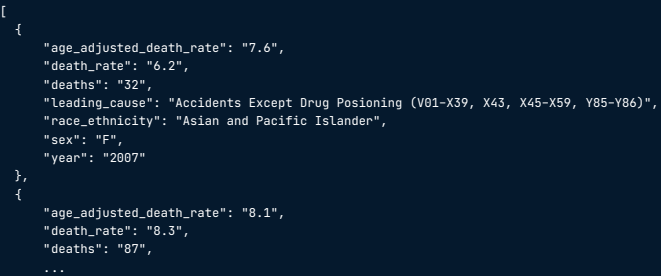

1. Column orientation

    - more space-efficient than record orientation

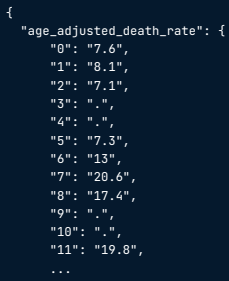

1. Split orientation

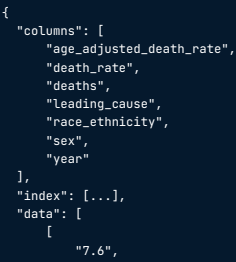


#### Specifying the orientation
```python

death_causes = pd.read_json('nyc_death_causes.json', orient='split')

```

## Introduction to API

### Application Programming Interface

- Define how a application communicates with other programs

### Requests 

- Is a library that hels us to do API calls
- Send and get data from websites

#### `requests.get()` method

- `requests.get(url)` to get data from a URL
- Keyword arguments:
    - `params`: takes a dictionary to cus customiza the API requests
    - `headers`: takes a dictionary, is used to provide user authentication
- Result: `response` object, containing data and metadata
    - `response.json()` will return just the JSON data as a dictionary
- To use it with `pandas` is not possible to use the `read_json()` method, because this method expects a string, not a dictionary. Instead, is possible to load as a dataframe using `pd.DataFrame`


## Example with Yelp Business Search API

### Making requests

documentation from Yelp
- parameters

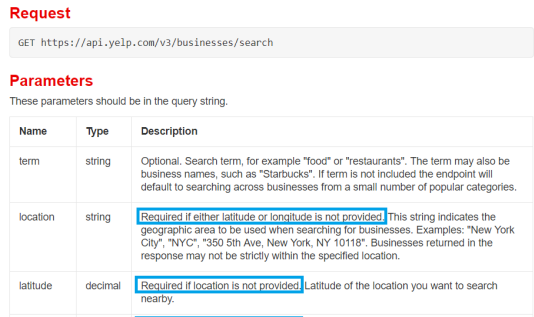

- respose body

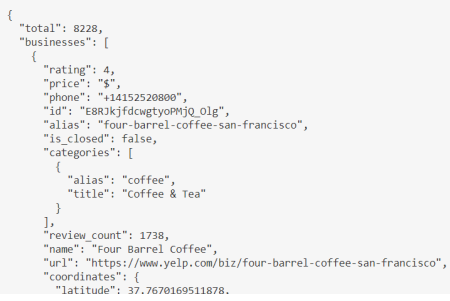

- Code example

```python
import requests
import pandas as pd

api_url = "https://api.yelp.com/v3/businesses/search"

#set up parameters according to documentation
params= {"term": "bookstore",
        "location": "San Francisco"}

headers ={"Authorization": "Bearer {}".format(api_key)}

#Query the Yelp API with headers and params set
response = requests.get(api_url, params=params, headers=headers)

#Extract JSON data from response
data = response.json()

#Load "businesses" values to a data frame
bookstore = pd.DataFrame(data['businesses'])

```

## Working with nested JSONs

### Nested JSON

- A JSON is nested when the value of a key-value pair is an object.

Example:

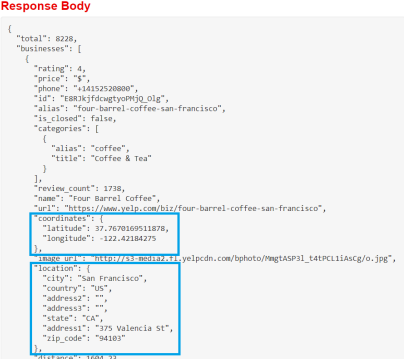

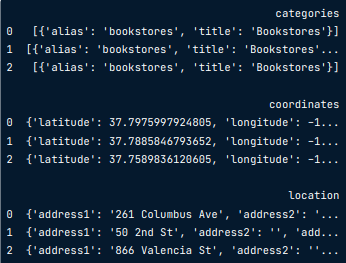

- `pandas.io.json` is a submodulefrom `pandas` for read and write JSON. It needs to have its own `import` statment
- For handle JSON nested objects is ideal to use `pandas.io.json` and `json_normalize()`
- `json_normalize()` receives a dictionary or a list of dictionaries and returns s flattened dataframe. 
- The default flattened column receives a name as `attribute.nestedattribute`, but you can choose a different separator with the argument `sep`

```python
bookstore = json_normalize(data['businesses'], sep='_')
```

### Deeply nested JSON

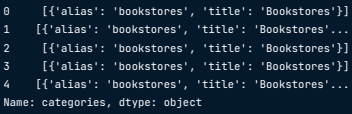

- to handle with deep nested JSONs like the example above, you can use `json_normalize()` with the following arguments keywords:
    - `record_path`: sting or a list of string attributes to nested data
    - `meta`:  list of other attributes to load to dataframe
    - `meta_prefix`: string prefix to meta column names

```python
df = json_normalize(data['businesses'], 
                    sep='_',
                    record_path='categories',
                    meta=['name', 'alias', 'rating', ['coordinates', 'latitude'], ['coordinates', 'longitude']],
                    meta_prefix='biz_'
                    )
```

## Combining multiple datasets

### Concat

- Concatenate pandas objects along a particular axis.
- `axis`: The axis to concatenate along. 0 for rows and 1 for columns. The default is 0.
- `ignore_index`: `True` to renumber the index. The default is False.

```python
pd.concat([df1, df2], ignore_index=True)
```

### Merging

- Used to combine data via shared key. Is a `pandas` version of a SQL join.
- Can receive arguments like:
    - `on` if the column name is the same in both dataframes
    - `left_join` or `right_join` if the key names are different
- Default `merge()` behavior: return only values that are in both dataframes


```python
merged = call_counts.merge(weather, left_on="created_date", right_on="date")
```
